# Task : Predicting music genre for specific age and gender

### Importing Dependencies

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Data Exploring

In [2]:
df = pd.read_csv("music.csv")
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [4]:
len(df)

18

In [5]:
df["genre"].value_counts()

Classical    6
HipHop       3
Jazz         3
Dance        3
Acoustic     3
Name: genre, dtype: int64

In [6]:
pd.crosstab(df.age,df.genre)

genre,Acoustic,Classical,Dance,HipHop,Jazz
age,,,,,
20,0,0,1,1,0
21,0,0,1,0,0
23,0,0,0,1,0
25,0,0,1,1,0
26,1,0,0,0,1
27,1,0,0,0,0
29,0,0,0,0,1
30,1,0,0,0,1
31,0,2,0,0,0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Acoustic'),
  Text(1, 0, 'Classical'),
  Text(2, 0, 'Dance'),
  Text(3, 0, 'HipHop'),
  Text(4, 0, 'Jazz')])

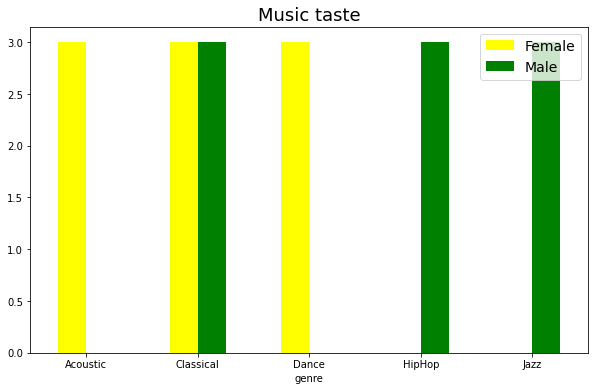

In [7]:
#plot the crosstab result

pd.crosstab(df.genre, df.gender).plot(kind = "bar",
                                                figsize = (10,6),
                                                color = ["yellow", "green"])

plt.title("Music taste", fontsize = 18)

plt.legend(["Female","Male"], fontsize = 14)
plt.xticks(rotation = 0)

<AxesSubplot:ylabel='Frequency'>

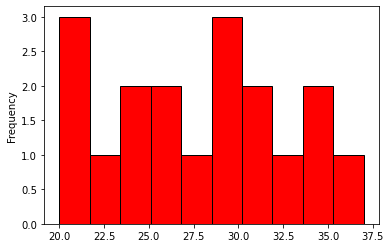

In [11]:
# Check the Age distribution of Heart Disease with a Histrogram

df.age.plot.hist(color = "red",edgecolor = "k")

# Model Building

In [13]:
#spliting the data

X = df.drop(["genre"],axis = 1)
y = df["genre"]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
models = {"LogisticRegression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

#creating a function to fit models and scores

def fit_and_score(models, X_train,X_test,y_train,y_test):
    
    #random seed
    np.random.seed(21)
    
    model_score = {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test, y_test)
        
    return model_score

In [18]:
model_score = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_score

/home/robin/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 1.0, 'KNN': 0.5, 'Random Forest': 0.75}

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [24]:
clf.score(X_test,y_test)

1.0

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_pred

array(['Dance', 'Classical', 'Classical', 'Jazz'], dtype=object)

In [27]:
X_test

,age,gender
10,21,0
6,31,1
7,33,1
5,30,1


In [29]:
new_test_df = pd.DataFrame()

In [30]:
new_test_df["age"] = [24,25,27,28,22,30]
new_test_df["gender"] = [0,0,1,1,1,0]

In [31]:
new_test_df

,age,gender
0,24,0
1,25,0
2,27,1
3,28,1
4,22,1
5,30,0


In [33]:
test_df_pred = clf.predict(new_test_df)

In [34]:
test_df_pred

array(['Dance', 'Acoustic', 'Jazz', 'Jazz', 'HipHop', 'Acoustic'],
      dtype=object)

In [35]:
#Confusion Matrix

print(confusion_matrix(y_test, y_pred))

[[2 0 0]
 [0 1 0]
 [0 0 1]]


In [37]:
df["genre"].unique()

array(['HipHop', 'Jazz', 'Classical', 'Dance', 'Acoustic'], dtype=object)

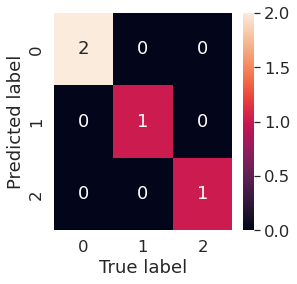

In [42]:
sns.set(font_scale = 1.5)

def conf_mat(y_test, y_pred):
    
    fig,ax = plt.subplots(figsize = (4,4))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                     annot = True,
                     cbar = True)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
conf_mat(y_test,y_pred)

In [43]:
y_test

10        Dance
6     Classical
7     Classical
5          Jazz
Name: genre, dtype: object

In [44]:
y_pred

array(['Dance', 'Classical', 'Classical', 'Jazz'], dtype=object)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Classical       1.00      1.00      1.00         2
       Dance       1.00      1.00      1.00         1
        Jazz       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



# KNN Model

In [49]:
clf_1 = KNeighborsClassifier()

clf_1.fit(X_train, y_train)

clf_1.score(X_test,y_test)

0.5

# Hyperparameter Tuning

In [51]:
# Lets tune KNN

train_scores = []
test_scores = []

neighbors = range(1,10)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test,y_test))

In [52]:
#check Train score of KNN
train_scores

[1.0,
 0.5714285714285714,
 0.5714285714285714,
 0.7142857142857143,
 0.7142857142857143,
 0.6428571428571429,
 0.5714285714285714,
 0.6428571428571429,
 0.6428571428571429]

In [53]:
#test score

test_scores

[0.75, 0.5, 0.25, 0.75, 0.5, 0.5, 0.5, 0.25, 0.25]

Text(0.5, 1.0, 'Max KNN score on test data :75.00%')

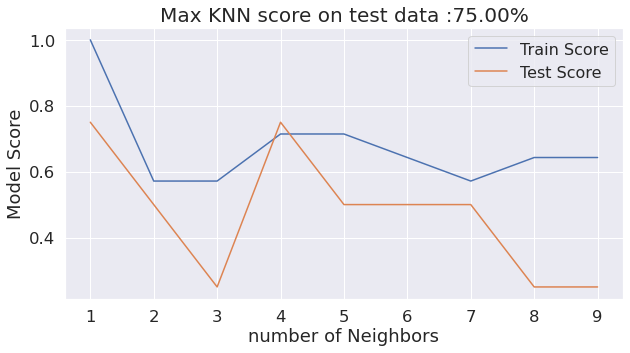

In [54]:
plt.figure(figsize = (10,5))
plt.plot(neighbors, train_scores,label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("number of Neighbors",fontsize = 18)
plt.ylabel("Model Score",fontsize = 18)
plt.legend(fontsize = 16)
plt.title(f"Max KNN score on test data :{max(test_scores)*100:.2f}%", fontsize = 20)

In [ ]:
knn = KNeighborsClassifier()

## Hyperparameter Tuning with RandomizedSearchCV

In [55]:
# create a Hyperparameter grid for KNN

knn_grid = {"n_neighbors":np.arange(1,6,1),
            "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            "weights" : ['uniform', 'distance'],
            "p":        [1,2]}

In [56]:
np.random.seed(21)

knn_cv = RandomizedSearchCV(KNeighborsClassifier(),
                            param_distributions = knn_grid,
                            cv = 3,
                            n_iter = 20,
                            verbose = True)

knn_cv.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': array([1, 2, 3, 4, 5]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [57]:
knn_cv.best_params_

{'weights': 'uniform', 'p': 2, 'n_neighbors': 3, 'algorithm': 'auto'}

In [61]:
knn = KNeighborsClassifier(n_neighbors = 3,
                           weights = 'uniform',
                           p = 2,
                           algorithm = 'auto')

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
knn.score(X_test, y_test)

0.25

**KNN after tunned with best parameters are performing very poor and showing the model is underfited. Let's just train the model with n_neighbors parameter**

In [67]:
knn_1 = KNeighborsClassifier(n_neighbors = 4)

knn_1.fit(X_train,y_train)

knn_1.score(X_test,y_test)

0.75

In [68]:
y_preds = knn_1.predict(X_test)

In [69]:
y_preds

array(['Dance', 'Classical', 'Classical', 'Acoustic'], dtype=object)

In [70]:
y_test

10        Dance
6     Classical
7     Classical
5          Jazz
Name: genre, dtype: object

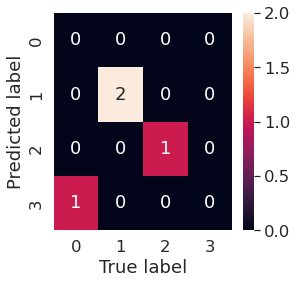

In [71]:
sns.set(font_scale = 1.5)

def conf_mat(y_test, y_pred):
    
    fig,ax = plt.subplots(figsize = (4,4))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot = True,
                     cbar = True)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
conf_mat(y_test,y_preds)

In [72]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

    Acoustic       0.00      0.00      0.00         0
   Classical       1.00      1.00      1.00         2
       Dance       1.00      1.00      1.00         1
        Jazz       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.75      0.75      0.75         4



# Hyperparameter Tuning with GridSearchCV

In [77]:
# create a Hyperparameter grid for KNN

knn_grid = {"n_neighbors":np.arange(1,6,1),
            "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            "weights" : ['uniform', 'distance'],
            "p":        [1,2]}

knn_GridCV = GridSearchCV(KNeighborsClassifier(),
                          param_grid = knn_grid,
                          cv = 3,
                          verbose = True)

knn_GridCV.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([1, 2, 3, 4, 5]), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [78]:
knn_GridCV.best_params_

{'algorithm': 'brute', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

In [79]:
knn_GridCV.score(X_test,y_test)

0.75

In [80]:
# Make prediction with tunned model

y_preds = knn_GridCV.predict(X_test)

In [81]:
y_preds

array(['Dance', 'Classical', 'Classical', 'Acoustic'], dtype=object)

In [83]:
#Confusion Matrix

print(confusion_matrix(y_test, y_preds))

[[0 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [1 0 0 0]]


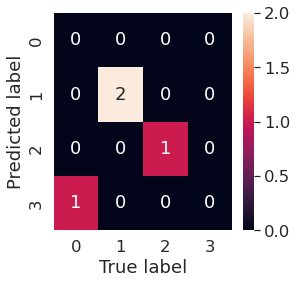

In [84]:
sns.set(font_scale = 1.5)

def conf_mat(y_test, y_preds):
    
    fig,ax = plt.subplots(figsize = (4,4))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot = True,
                     cbar = True)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
conf_mat(y_test,y_preds)

In [85]:
#classification report 

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

    Acoustic       0.00      0.00      0.00         0
   Classical       1.00      1.00      1.00         2
       Dance       1.00      1.00      1.00         1
        Jazz       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.75      0.75      0.75         4



In [86]:
# prediction for new_dataset

knn_GridCV.predict(new_test_df)

array(['HipHop', 'Acoustic', 'Jazz', 'Jazz', 'HipHop', 'Acoustic'],
      dtype=object)